In [26]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy import displacy
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stop_words = set(stopwords.words('english'))

In [28]:
# Carga de datos
df = pd.read_csv('scopusproyecto.csv')
df.head()


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Index Keywords,Editors,Publisher,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Divya D.M.; Karthika Devi M.S.; Ramachandran B.,"Divya, D.M. (58420966000); Karthika Devi, M.S....",58420966000; 55091080300; 38961968400,SPEG—Semiotics-Based Panel Extraction from Gra...,2023,Lecture Notes in Electrical Engineering,1007 LNEE,NaN,NaN,315.0,...,Deep learning; Extraction; Learning systems; L...,Kumar Singh K.; Bajpai M.K.; Sheikh Akbari A.,Springer Science and Business Media Deutschlan...,English,Lect. Notes Electr. Eng.,Conference paper,Final,NaN,Scopus,2-s2.0-85161576319
1,Kim M.; Mohanty A.; Kadetotad D.; Wei L.; He X...,"Kim, Minkyu (56969839400); Mohanty, Abinash (5...",56969839400; 56470320800; 56109513600; 5719362...,A Real-Time 17-Scale Object Detection Accelera...,2019,IEEE Transactions on Circuits and Systems I: R...,66,10.0,8741167.0,3843.0,...,Classification (of information); CMOS integrat...,NaN,Institute of Electrical and Electronics Engine...,English,IEEE Trans. Circuits Syst. Regul. Pap.,Article,Final,All Open Access; Bronze Open Access,Scopus,2-s2.0-85072973325
2,Shikha N.; Pranav R.; Singh N.R.; Umadevi V.; ...,"Shikha, N. (58178663100); Pranav, R. (22433428...",58178663100; 22433428500; 58285477100; 3524143...,Kannada Word Detection in Heterogeneous Scene ...,2023,Proceedings of the 10th International Conferen...,NaN,NaN,NaN,379.0,...,Computer vision; Deep learning; Deep learning;...,Pandey M.K.; Rai J.K.; Kumar P.; Dubey A.K.; S...,Institute of Electrical and Electronics Engine...,English,Proc. Int. Conf. Signal Process. Integr. Netwo...,Conference paper,Final,NaN,Scopus,2-s2.0-85160008723
3,Shrestha O.K.; Khatiwada S.; Ghimire A.; Rajbh...,"Shrestha, Oskar Krishna (58674387900); Khatiwa...",58674387900; 58674336600; 58674352500; 5867445...,Hybrid Algorithm for Real-Time Sign Language D...,2023,"2023 International Conference on Network, Mult...",NaN,NaN,NaN,NaN,...,Audition; Deep learning; Learning algorithms; ...,NaN,Institute of Electrical and Electronics Engine...,English,"Int. Conf. Netw., Multimed. Inf. Technol., NMI...",Conference paper,Final,NaN,Scopus,2-s2.0-85175401238
4,Kumar D.S.; Swathi E.K.; Magisha S.; Priyavars...,"Kumar, D. Sathish (57211312840); Swathi, E.K. ...",57211312840; 58965582600; 58964901400; 5896584...,Voiz: Automated Traffic Sign and Obstacle Dete...,2023,2023 Intelligent Computing and Control for Eng...,NaN,NaN,NaN,NaN,...,Deep learning; Object detection; Obstacle dete...,NaN,Institute of Electrical and Electronics Engine...,English,"Intell. Comput. Control Eng. Bus. Syst., ICCEBS",Conference paper,Final,NaN,Scopus,2-s2.0-85189176066


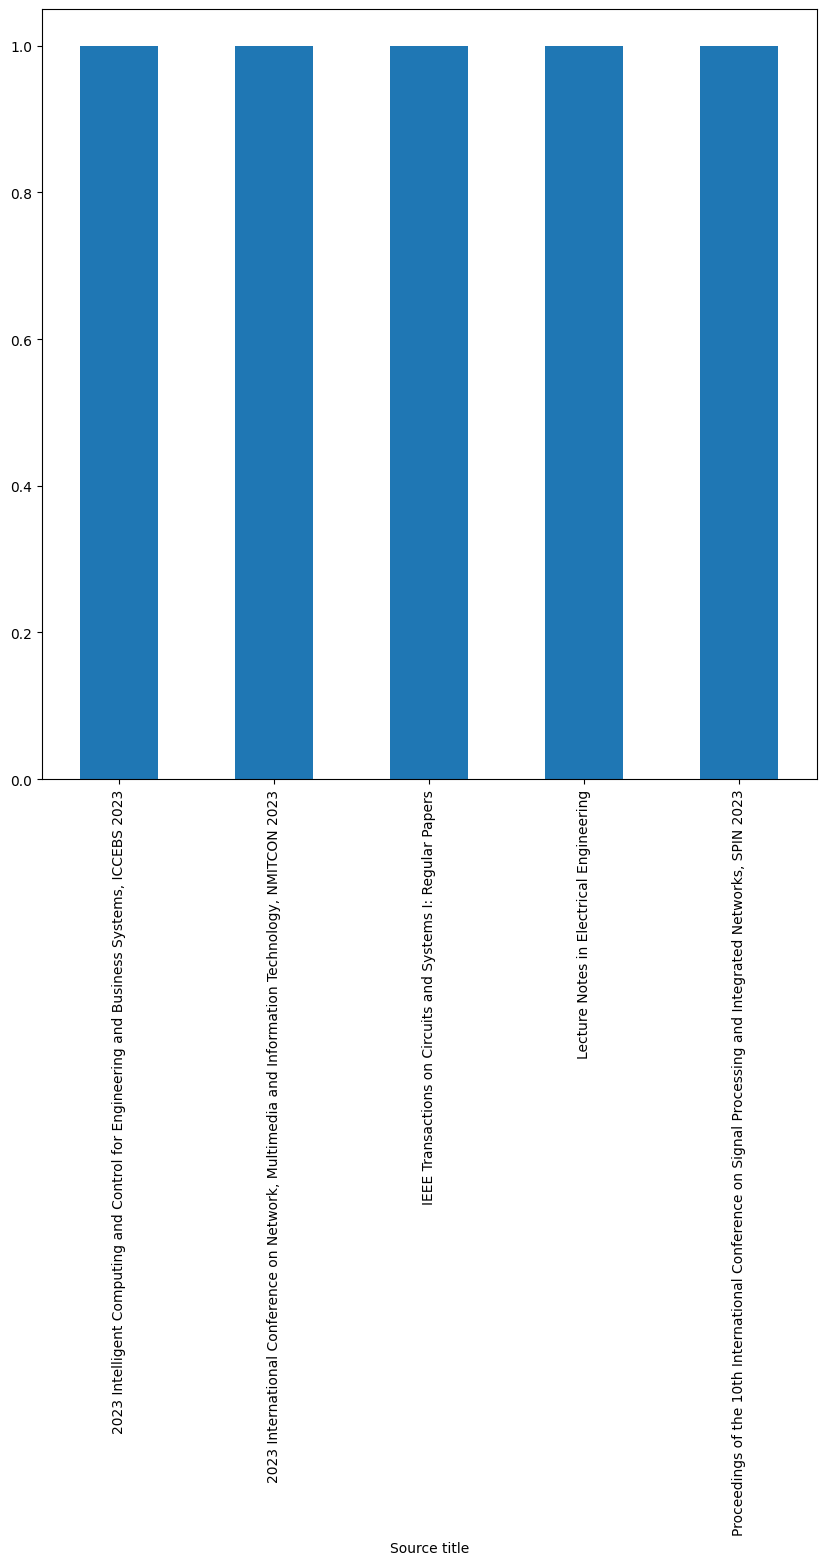

In [29]:
grouped = df.groupby('Source title')['Title'].count()
plt.figure(figsize=(10, 10))
grouped.plot(kind='bar')
plt.show()



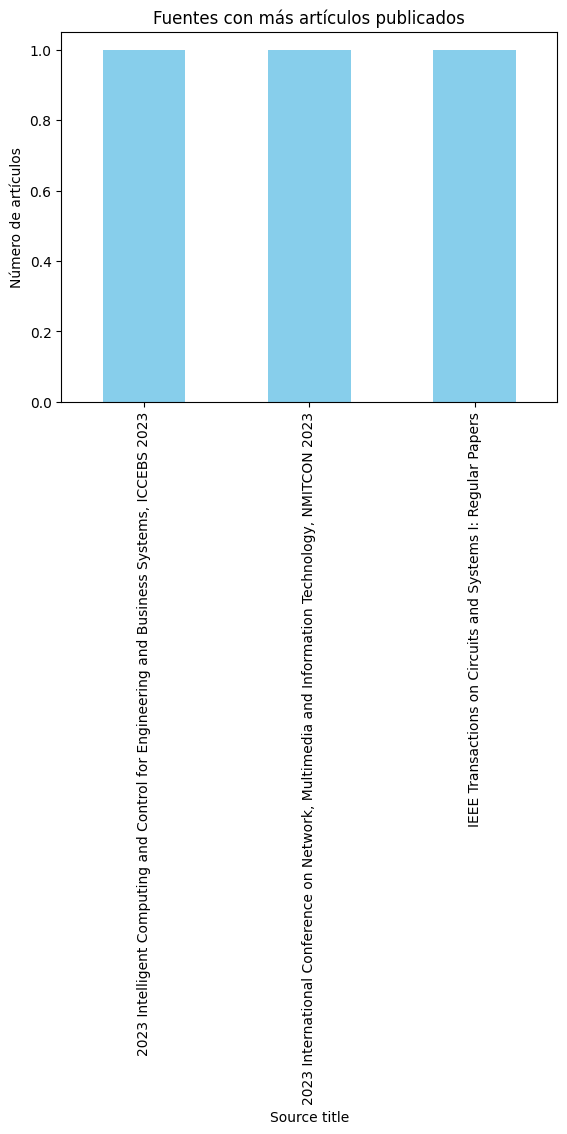

In [37]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(3)
top_sources.plot(kind='bar', color='skyblue')
plt.title('Fuentes con más artículos publicados')
plt.xlabel('Source title')
plt.ylabel('Número de artículos')
plt.show()

In [31]:
# Función para limpiar y preparar texto
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words])

In [32]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df.head(20)

,Word,Frequency,Rank
0,detection,4,1.0
1,realtime,2,2.0
2,sign,2,2.0
3,speg—semioticsbased,1,3.0
4,voiz,1,3.0
5,images,1,3.0
6,hybrid,1,3.0
7,algorithm,1,3.0
8,language,1,3.0
9,system,1,3.0


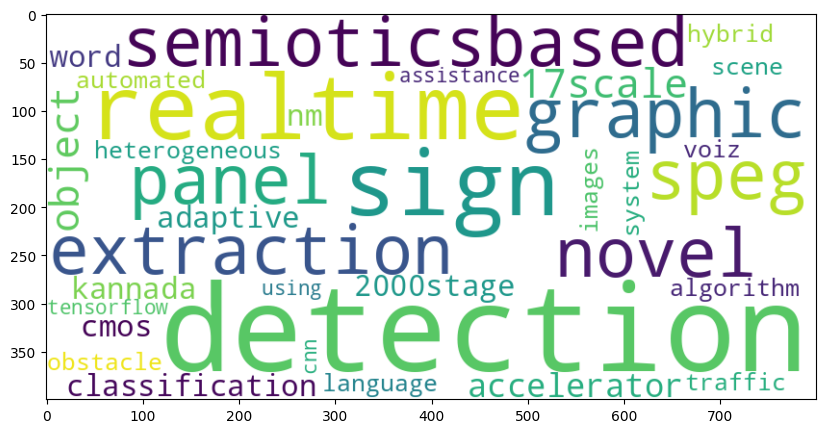

In [33]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

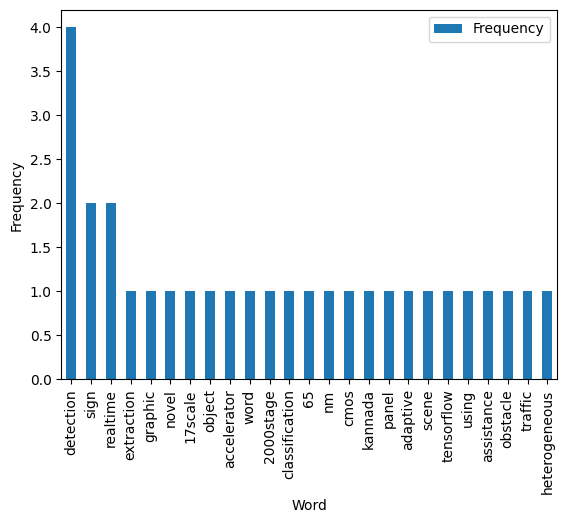

In [34]:
import matplotlib.pyplot as plt
word_df.sort_values(by='Frequency', ascending=False).head(25).plot(x='Word', y='Frequency', kind='bar')
plt.xlabel('Word')
_ = plt.ylabel('Frequency')


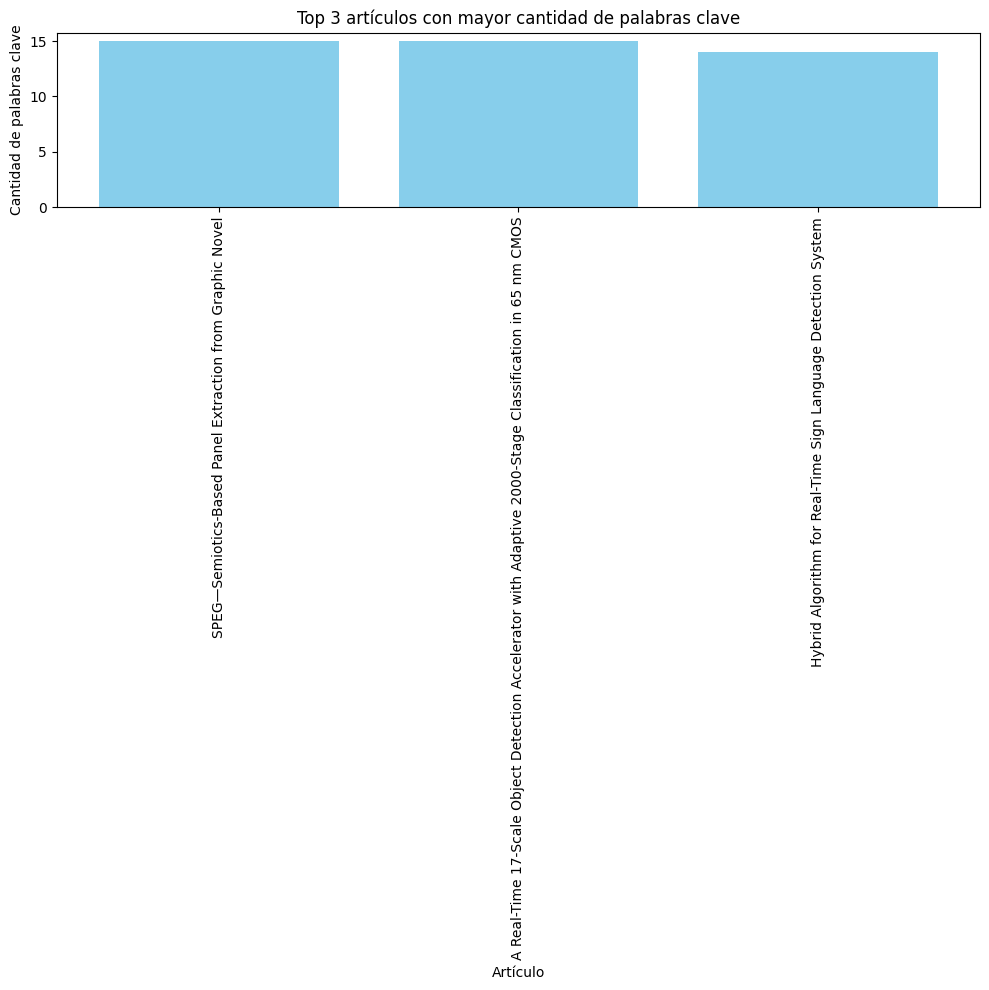

In [36]:
# Contar palabras en todos los títulos
word_counts = Counter()
df['Title'].apply(lambda title: word_counts.update(clean_text(title)))

# Determinar un número de palabras clave a considerar (e.g., top 3)
num_keywords = 15
keywords = [word for word, count in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title)
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 3 artículos con más palabras clave
plt.figure(figsize=(10, 10))
plt.bar(df_sorted['Title'].head(3), df_sorted['keyword_count'].head(3), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad de palabras clave')
plt.title('Top 3 artículos con mayor cantidad de palabras clave')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [22]:
# Seleccionar los abstracts de los artículos con más palabras clave
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(10)['Abstract']

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:3]  # Tomar las 3 oraciones con mayor puntuación
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")


Resumen 1:
A graphic novel is the composition of a text and graphic. In this work, to identify the semiotics at different locations from a graphic novel strip, a custom YOLOv3 detector model is trained followed by the panel extraction. © 2023, The Author(s), under exclusive license to Springer Nature Singapore Pte Ltd.

Resumen 2:
While machine learning algorithms have been successfully used in many practical applications, accurate, fast, and low-power hardware implementations of such algorithms is still a challenging task, especially for mobile systems such as Internet of Things (IoT), autonomous vehicles, and smart drones. This can be implemented with a more modular hardware, compared to support vector machine (SVM) and deformable parts model (DPM) designs. By jointly optimizing the algorithm and the efficient hardware architecture, the prototype chip implemented in 65nm CMOS demonstrates real-Time object detection of 20-50 frames/s with low power consumption of 22.5-181.7 mW (0.54-1

In [23]:
# Contar la aparición de palabras clave en cada título
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(10)

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:2]
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado y almacenar junto con el título
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")

Title: SPEG—Semiotics-Based Panel Extraction from Graphic Novel
Summary: A graphic novel is the composition of a text and graphic. In this work, to identify the semiotics at different locations from a graphic novel strip, a custom YOLOv3 detector model is trained followed by the panel extraction.

Title: A Real-Time 17-Scale Object Detection Accelerator with Adaptive 2000-Stage Classification in 65 nm CMOS
Summary: While machine learning algorithms have been successfully used in many practical applications, accurate, fast, and low-power hardware implementations of such algorithms is still a challenging task, especially for mobile systems such as Internet of Things (IoT), autonomous vehicles, and smart drones. This can be implemented with a more modular hardware, compared to support vector machine (SVM) and deformable parts model (DPM) designs.

Title: Kannada Word Detection in Heterogeneous Scene Images
Summary: Moreover, building a single language scene text detector in a multilingual

<ipython-input-24-b453cffdecc5>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama


<Figure size 1500x1000 with 0 Axes>

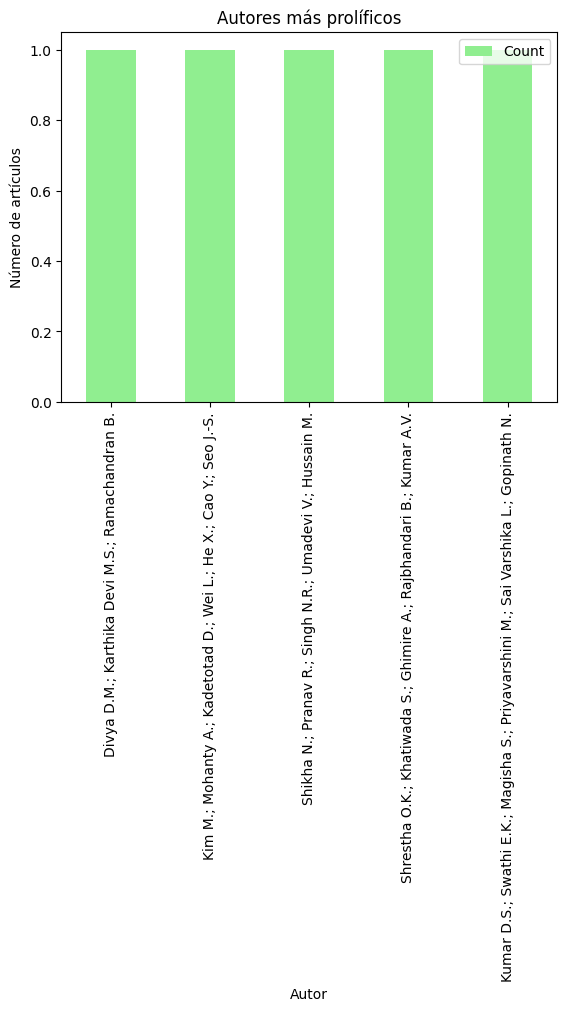

In [24]:
# Contar los artículos por autor
author_counts = df['Authors'].str.split(', ').explode().value_counts().reset_index()
author_counts.columns = ['Author', 'Count']

# Mostrar los autores más prolíficos
top_authors = author_counts.head(10)
plt.figure(figsize=(15, 10))
top_authors.plot(kind='bar', x='Author', y='Count', color='lightgreen')
plt.title('Autores más prolíficos')
plt.xlabel('Autor')
plt.ylabel('Número de artículos')

# Ajustar las etiquetas de los ejes x
plt.xticks(rotation=90, ha='center')
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()


<ipython-input-15-a2de706cbf69>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_df['POS'], y=pos_df['Count'], palette='viridis')


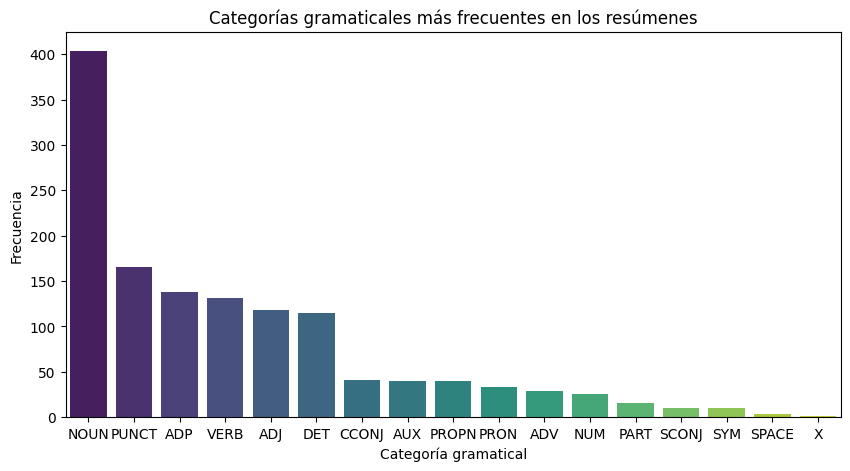

In [15]:
nlp = spacy.load("en_core_web_sm")

def get_pos_tags(text):
    doc = nlp(text)
    pos_counts = Counter([token.pos_ for token in doc])
    return pos_counts

# Ejemplo con los resúmenes
df['POS_Tags'] = df['Abstract'].apply(lambda x: get_pos_tags(x))

# Visualización de categorías gramaticales más frecuentes
all_pos_counts = Counter()
for pos_counts in df['POS_Tags']:
    all_pos_counts.update(pos_counts)

pos_df = pd.DataFrame(all_pos_counts.items(), columns=['POS', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=pos_df['POS'], y=pos_df['Count'], palette='viridis')
plt.title('Categorías gramaticales más frecuentes en los resúmenes')
plt.xlabel('Categoría gramatical')
plt.ylabel('Frecuencia')
plt.show()
